In [325]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',100)
%matplotlib inline
columns=['id', 'host_id', 'host_since', 'host_is_superhost',  'host_listings_count', 'neighbourhood', 'neighbourhood_cleansed', 'city', 'zipcode',
         'latitude', 'longitude','property_type','room_type', 'accommodates', 'price', 'minimum_nights', 'maximum_nights', 'availability_365', 'number_of_reviews',
         'review_scores_rating']
listings=pd.read_csv('listings.csv.gz',usecols=columns)
listings['host_since']=pd.to_datetime(listings['host_since'])
listings['price']=listings.price.str.replace('$', '')
listings['price']=listings.price.str.replace(',','')
listings['price']=listings.price.astype(float)
listings.host_since.bfill(axis='rows',inplace=True)
listings['year']=listings.host_since.dt.year
listings['year']=pd.to_numeric(listings['year'])
listings.head(3)

,id,host_id,host_since,host_is_superhost,host_listings_count,neighbourhood,neighbourhood_cleansed,city,zipcode,latitude,longitude,property_type,room_type,accommodates,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,year
0,11156,40855,2009-09-23,f,1.0,Elizabeth Bay/Rushcutters Bay,Sydney,Potts Point,2011,-33.86917,151.22656,Apartment,Private room,1,64.0,2,180,364,196,92.0,2009
1,12351,17061,2009-05-14,f,2.0,Pyrmont,Sydney,Pyrmont,2009,-33.86515,151.19190,Townhouse,Private room,2,14314.0,2,7,0,526,95.0,2009
2,14250,55948,2009-11-20,t,2.0,Balgowlah,Manly,Balgowlah,2093,-33.80093,151.26172,House,Entire home/apt,6,471.0,5,22,173,2,90.0,2009


Text(0, 0.5, 'Number of Listings')

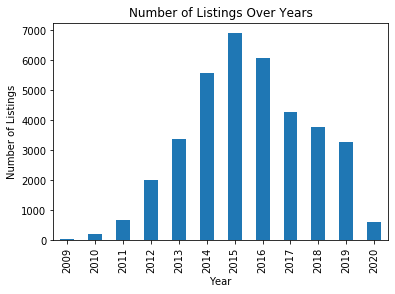

In [340]:
# listings.year.value_counts(ascending=True)
listings.year.value_counts(ascending=True).sort_index().plot(kind='bar')
plt.title('Number of Listings Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Listings')
# listings.year.dtypes


Text(0, 0.5, 'Number of Listings')

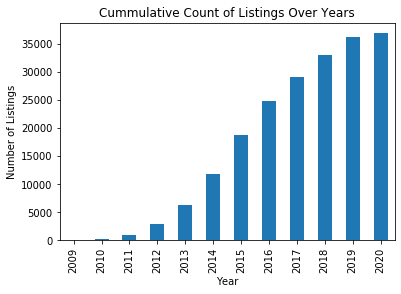

In [344]:
# listings.host_since.bfill(axis='rows',inplace=True)
listings.year.value_counts(ascending=True).sort_index().cumsum().plot(kind='bar')
plt.title('Cummulative Count of Listings Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Listings')


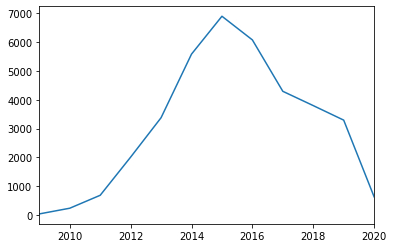

In [363]:
listings.year.value_counts(ascending=True).sort_index().plot()


In [364]:
listings.host_since.dtype
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36901 entries, 0 to 36900
Data columns (total 21 columns):
id                        36901 non-null int64
host_id                   36901 non-null int64
host_since                36901 non-null datetime64[ns]
host_is_superhost         36894 non-null object
host_listings_count       36894 non-null float64
neighbourhood             31769 non-null object
neighbourhood_cleansed    36901 non-null object
city                      36873 non-null object
zipcode                   36776 non-null object
latitude                  36901 non-null float64
longitude                 36901 non-null float64
property_type             36901 non-null object
room_type                 36901 non-null object
accommodates              36901 non-null int64
price                     36901 non-null float64
minimum_nights            36901 non-null int64
maximum_nights            36901 non-null int64
availability_365          36901 non-null int64
number_of_reviews    

In [330]:
# listings.host_total_listings_count.unique()
# listings[['host_listings_count', 'host_total_listings_count']][]
# listings[['number_of_reviews', 'review_scores_rating']]
# # listings[listings['host_listings_count'] == listings['host_total_listings_count']].shape# listings.h# listings.host_since.min()
# listings.host_since.min()
# listings.host_since.max()
# listings.instant_bookable.value_counts()
# listings.shape
# listings['host_since'].dt.year
# listings.review_scores_rating.isnull().sum()
# listings.bed_type.value_counts()
# listings.price.dtypes
# listings.price.isnull().sum()
# listings.neighbourhood.unique()
# listings.neighbourhood_cleansed.isnull().sum()
# listings[listings.host_since.isnull()]
# reviews=listings.groupby('year')['number_of_reviews'].sum()
# listings.groupby('year')['number_of_reviews'].sum().plot(kind='bar')
# bookings.sum(), listings.number_of_reviews.sum()
# sns.barplot(listings.neighbourhood_cleansed,listings.groupby('neighbourhood_cleansed')['host_id'].count().sort_values(ascending=False),
#             data=listings) 

In [355]:
host_id_count=listings.host_id.value_counts()
unique_hosts=len(host_id_count)
single_listings=host_id_count[host_id_count==1].count()
multi_listings=len(listings.host_id) - single_listings
len(listings.host_id), unique_hosts, multi_listings, single_listings
percentages=[round(multi_listings/len(listings.host_id)*100,0),round(single_listings/len(listings.host_id)*100,0)]
percentages
[multi_listings, single_listings]

[37.0, 63.0]

([<matplotlib.patches.Wedge at 0x6b59d73e88>,
 [Text(0.45672005841954216, 1.0554178263783733, 'multi_listings'),
  Text(-0.4368626645752139, -1.0095300947967052, 'single_listings')],
 [Text(0.2581461199762629, 0.5965405105616891, '37%'),
  Text(-0.23828872613193483, -0.550652778980021, '63%')])

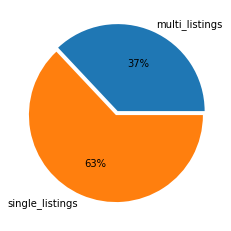

In [362]:
plt.pie(percentages, labels=['multi_listings', 'single_listings'],autopct='%1.0f%%', explode=[0.05,0], rotatelabels=False)

In [365]:
listings.columns

Index(['id', 'host_id', 'host_since', 'host_is_superhost',
       'host_listings_count', 'neighbourhood', 'neighbourhood_cleansed',
       'city', 'zipcode', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'price', 'minimum_nights',
       'maximum_nights', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'year'],
      dtype='object')

Text(0, 0.5, 'Number of Estimated Bookings')

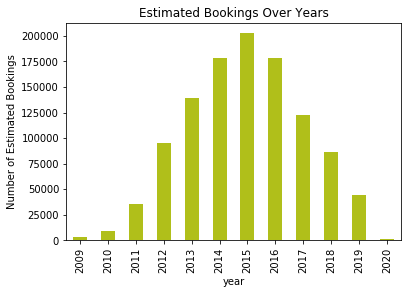

In [397]:
# reviews=listings.groupby('year')['number_of_reviews'].sum()
# listings.groupby('year')['number_of_reviews'].sum().plot(kind='bar')
bookings=listings.groupby('year')['number_of_reviews'].sum()
bookings =bookings * 2
# bookings.sum(), listings.number_of_reviews.sum()
bookings.plot(kind='bar', color='#B0BF1A')
plt.title('Estimated Bookings Over Years')
plt.ylabel('Number of Estimated Bookings')



548607.0

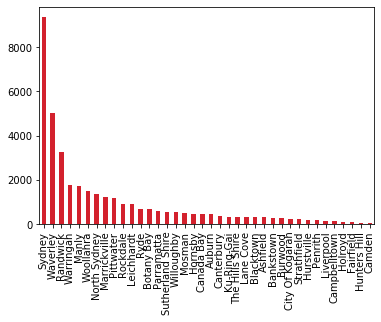

In [405]:
listings.neighbourhood_cleansed.unique()
nc=listings.neighbourhood_cleansed.value_counts()
nc.plot(kind='bar', color='#D3212D')
# fig, ax=plt.subplots()
# ax=sns.barplot(listings['neighbourhood_cleansed'], listings['host_id'],data=listings, ci=False, color='#D374B7')
# ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

Text(0.5, 1.0, 'Counts of Listings By Neighbourhood')

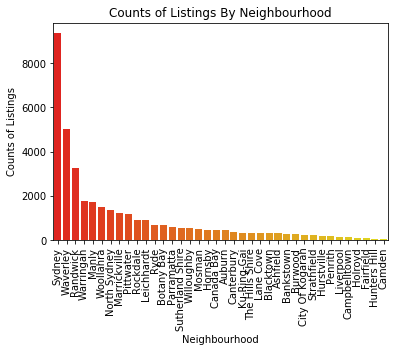

In [443]:
# sns.barplot(listings.neighbourhood_cleansed,listings.groupby('neighbourhood_cleansed')['host_id'].count().sort_values(ascending=False),
#             data=listings) 
ax1=sns.countplot(listings['neighbourhood_cleansed'], data=listings, order=listings['neighbourhood_cleansed'].value_counts().index,
                  palette='autumn', orient='v')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.set_xlabel('Neighbourhood')
ax1.set_ylabel('Counts of Listings')
ax1.set_title('Counts of Listings By Neighbourhood')